In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/muhammadhumayunkhan/ushape/ushape.csv
/kaggle/input/ushape1/ushape.csv
/kaggle/input/ushape/ushape.csv


In [17]:
df = pd.read_csv('/kaggle/input/d/muhammadhumayunkhan/ushape/ushape.csv',header=None,names=['X','Y','class'])

In [18]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [33]:
df.shape

(100, 3)

In [19]:
import matplotlib.pyplot as plt

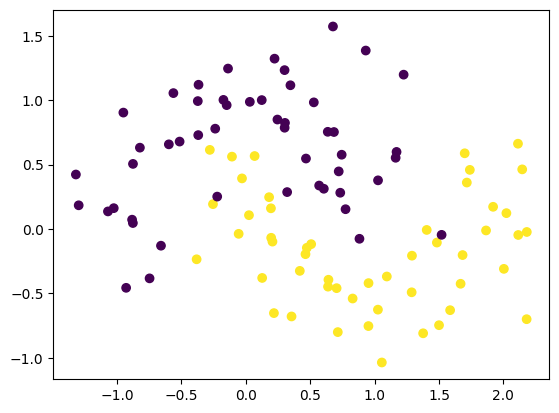

In [20]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [21]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# How not to set Weights

# All Zeros

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# RELU

In [24]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.get_weights()

[array([[-0.06807387, -0.9229872 ],
        [ 0.4594983 , -0.09448516]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.2680937],
        [-0.3452822]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
initial_weights = model.get_weights()

In [27]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.4641 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4883 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

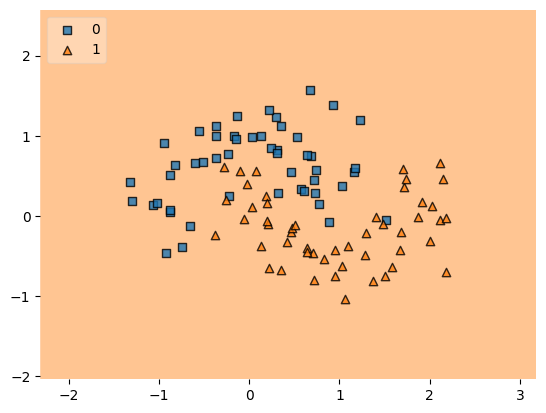

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# TANH

In [34]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.get_weights()

[array([[-0.2645409, -1.2138965],
        [-0.921394 , -0.9455785]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.2173281 ],
        [-0.05045414]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
initial_weights = model.get_weights()

In [37]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [38]:
model.set_weights(initial_weights)

In [39]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.4555 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4531 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4844 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [43]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.00608184], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

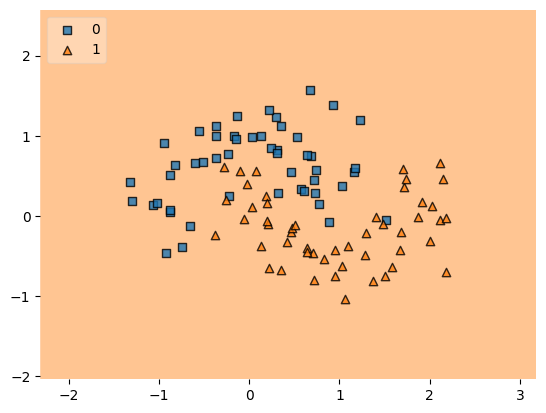

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# SIGMOID

In [45]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Set parameters to 0
model.get_weights()

[array([[-0.22971064, -0.9005947 ],
        [-0.56580985, -1.1705672 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.27506208],
        [0.07704711]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
initial_weights = model.get_weights()

In [48]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [49]:
model.set_weights(initial_weights)

In [50]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5273 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5195 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

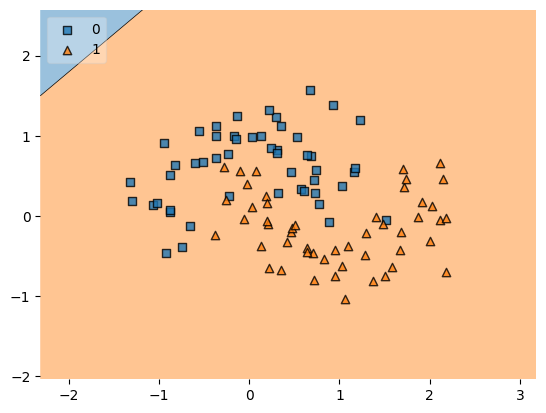

In [53]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# NON ZERO CONSTANT VALUE

# RELU

In [62]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Set parameters to 0
model.get_weights()

[array([[ 0.10950017,  0.1814748 ],
        [ 1.2230374 , -0.74998367]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.9309484],
        [-0.9593543]], dtype=float32),
 array([0.], dtype=float32)]

In [64]:
initial_weights = model.get_weights()

In [65]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)

In [66]:
model.set_weights(initial_weights)

In [67]:
model.get_weights()

[array([[1., 1.],
        [1., 1.]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4883 - loss: 2.3231 - val_accuracy: 0.5000 - val_loss: 1.7609
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4922 - loss: 2.2313 - val_accuracy: 0.5000 - val_loss: 1.7527
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4805 - loss: 2.3597 - val_accuracy: 0.5000 - val_loss: 1.7445
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5234 - loss: 2.0851 - val_accuracy: 0.5000 - val_loss: 1.7364
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5078 - loss: 2.3031 - val_accuracy: 0.5000 - val_loss: 1.7282
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5352 - loss: 2.0965 - val_accuracy: 0.5000 - val_loss: 1.7203
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5039 - loss: 2.2511 - val_accuracy: 0.5000 - val_loss: 1.7123
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5312 - loss: 2.1238 - val_accuracy: 0.5000 - val_loss

In [70]:
model.get_weights()

[array([[0.79613525, 0.79613525],
        [0.7286806 , 0.7286806 ]], dtype=float32),
 array([0.7334664, 0.7334664], dtype=float32),
 array([[0.73090035],
        [0.73090035]], dtype=float32),
 array([0.71328294], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

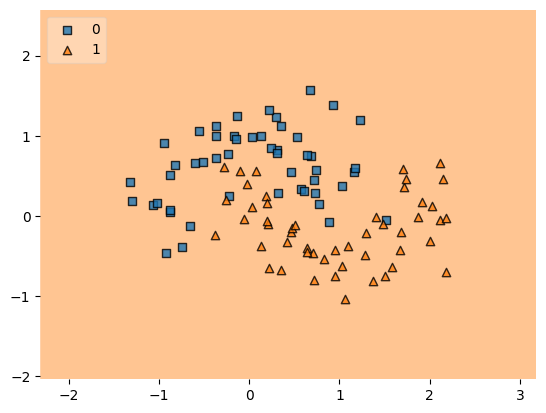

In [71]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# TANH

In [72]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Set parameters to 0
model.get_weights()

[array([[ 0.8771566 , -0.12201798],
        [-1.1202608 ,  0.5027362 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9404307],
        [ 1.0789121]], dtype=float32),
 array([0.], dtype=float32)]

In [74]:
initial_weights = model.get_weights()

In [75]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)

In [76]:
model.set_weights(initial_weights)

In [77]:
model.get_weights()

[array([[1., 1.],
        [1., 1.]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [78]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5156 - loss: 1.3496 - val_accuracy: 0.5000 - val_loss: 1.1764
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5156 - loss: 1.3609 - val_accuracy: 0.5000 - val_loss: 1.1715
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4805 - loss: 1.4234 - val_accuracy: 0.5000 - val_loss: 1.1667
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 1.3878 - val_accuracy: 0.5000 - val_loss: 1.1619
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5117 - loss: 1.3590 - val_accuracy: 0.5000 - val_loss: 1.1571
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4961 - loss: 1.4131 - val_accuracy: 0.5000 - val_loss: 1.1523
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4609 - loss: 1.4478 - val_accuracy: 0.5000 - val_loss: 1.1475
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4922 - loss: 1.4156 - val_accuracy: 0.5000 - val_loss

In [80]:
model.get_weights()

[array([[1.2374953 , 1.2374953 ],
        [0.69166875, 0.69166875]], dtype=float32),
 array([0.73364615, 0.73364615], dtype=float32),
 array([[0.727298],
        [0.727298]], dtype=float32),
 array([0.71803975], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

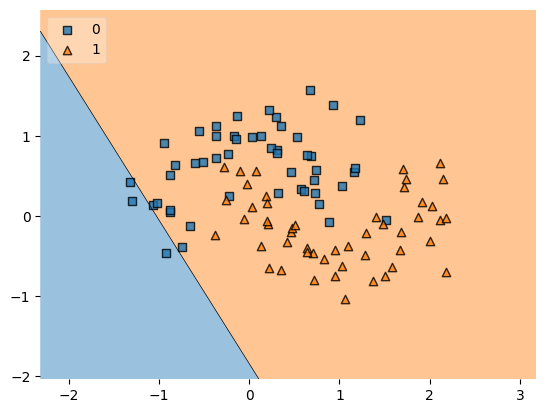

In [81]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# SIGMOID

In [82]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Set parameters to 0
model.get_weights()

[array([[ 0.1614964 ,  0.41410434],
        [-0.30532163, -0.3712793 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.116997 ],
        [-1.0582399]], dtype=float32),
 array([0.], dtype=float32)]

In [84]:
initial_weights = model.get_weights()

In [85]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)

In [86]:
model.set_weights(initial_weights)

In [87]:
model.get_weights()

[array([[1., 1.],
        [1., 1.]], dtype=float32),
 array([1., 1.], dtype=float32),
 array([[1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [88]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [89]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5117 - loss: 1.3494 - val_accuracy: 0.5000 - val_loss: 1.2921
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4922 - loss: 1.3986 - val_accuracy: 0.5000 - val_loss: 1.2882
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5273 - loss: 1.3184 - val_accuracy: 0.5000 - val_loss: 1.2844
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5117 - loss: 1.3563 - val_accuracy: 0.5000 - val_loss: 1.2805
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5156 - loss: 1.3302 - val_accuracy: 0.5000 - val_loss: 1.2766
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4961 - loss: 1.3836 - val_accuracy: 0.5000 - val_loss: 1.2728
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4844 - loss: 1.4128 - val_accuracy: 0.5000 - val_loss: 1.2690
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5039 - loss: 1.3701 - val_accuracy: 0.5000 - val_loss:

In [90]:
model.get_weights()

[array([[1.1980182, 1.1980182],
        [0.7107405, 0.7107405]], dtype=float32),
 array([0.7274368, 0.7274368], dtype=float32),
 array([[0.7242705],
        [0.7242705]], dtype=float32),
 array([0.71898633], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

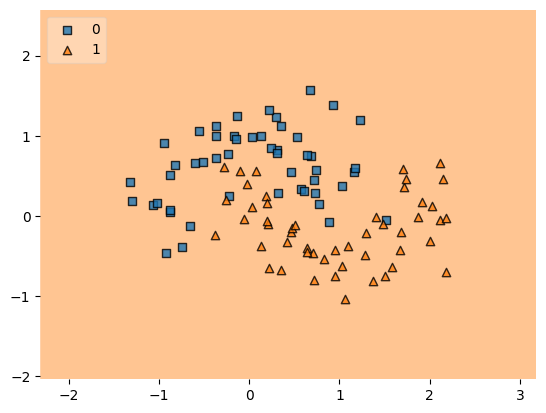

In [91]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Random weights but too small

In [93]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.get_weights()

[array([[-1.187091  ,  0.71339524],
        [ 0.86207664, -0.6195487 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.60437864,  0.4392004 ],
        [-0.5093095 , -0.6205675 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.8734511 ,  0.32958293],
        [-0.05644107, -0.4202562 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.0941838 , -0.43015772],
        [ 0.86974084, -0.18844438]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.86868185, -0.733209  ],
        [ 0.5767181 ,  0.6537219 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.1578053],
        [-1.1125668]], dtype=float32),
 array([0.], dtype=float32)]

In [100]:
initial_weights = model.get_weights()

In [102]:
a=[i*0.001 for i in initial_weights]

In [104]:
initial_weights=a

In [105]:
initial_weights

[array([[-0.00118709,  0.0007134 ],
        [ 0.00086208, -0.00061955]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00060438,  0.0004392 ],
        [-0.00050931, -0.00062057]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-8.7345118e-04,  3.2958295e-04],
        [-5.6441073e-05, -4.2025623e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-9.4183808e-05, -4.3015773e-04],
        [ 8.6974091e-04, -1.8844439e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00086868, -0.00073321],
        [ 0.00057672,  0.00065372]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00115781],
        [-0.00111257]], dtype=float32),
 array([0.], dtype=float32)]

In [106]:
model.set_weights(initial_weights)

In [107]:
model.get_weights()

[array([[-0.00118709,  0.0007134 ],
        [ 0.00086208, -0.00061955]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00060438,  0.0004392 ],
        [-0.00050931, -0.00062057]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-8.7345118e-04,  3.2958295e-04],
        [-5.6441073e-05, -4.2025623e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-9.4183808e-05, -4.3015773e-04],
        [ 8.6974091e-04, -1.8844439e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00086868, -0.00073321],
        [ 0.00057672,  0.00065372]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00115781],
        [-0.00111257]], dtype=float32),
 array([0.], dtype=float32)]

In [108]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4727 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [110]:
model.get_weights()

[array([[-0.00118709,  0.0007134 ],
        [ 0.00086208, -0.00061955]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00060438,  0.0004392 ],
        [-0.00050931, -0.00062057]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-8.7345118e-04,  3.2958295e-04],
        [-5.6441073e-05, -4.2025623e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-9.4183808e-05, -4.3015773e-04],
        [ 8.6974091e-04, -1.8844439e-04]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00086868, -0.00073321],
        [ 0.00057672,  0.00065372]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.00115781],
        [-0.00111257]], dtype=float32),
 array([-0.00627368], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

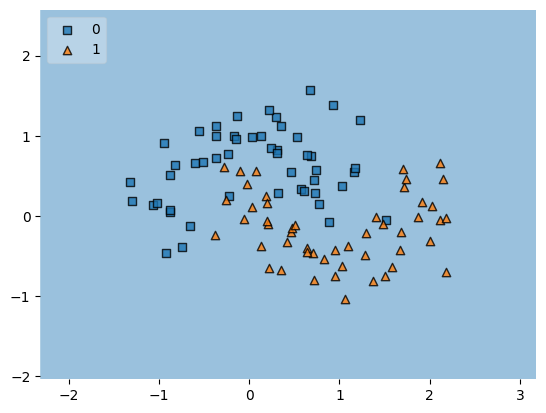

In [111]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Random weights but too big

In [124]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

In [125]:
model.get_weights()

[array([[-0.18128908,  0.50837183],
        [-1.139772  , -0.59435916]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.5682714 , -0.00914109],
        [ 0.3810339 ,  1.1481627 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1037399 , -1.2172945 ],
        [-0.10850585,  0.6913701 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.29790592, -1.077943  ],
        [ 0.13294935,  0.1598804 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.9737779 , -0.2607931 ],
        [ 0.52701616,  0.4287461 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3173071],
        [-0.9247416]], dtype=float32),
 array([0.], dtype=float32)]

In [126]:
initial_weights = model.get_weights()

In [127]:
a=[i*1000 for i in initial_weights]

In [128]:
a

[array([[ -181.28908,   508.37183],
        [-1139.7721 ,  -594.35913]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 568.2714  ,   -9.141088],
        [ 381.0339  , 1148.1627  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1103.7399  , -1217.2944  ],
        [ -108.505844,   691.3701  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ -297.9059 , -1077.943  ],
        [  132.94936,   159.8804 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 973.7779, -260.7931],
        [ 527.0162,  428.7461]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1317.3071 ],
        [ -924.74164]], dtype=float32),
 array([0.], dtype=float32)]

In [129]:
initial_weights =a

In [130]:
model.set_weights(initial_weights)

In [131]:
model.get_weights()

[array([[ -181.28908,   508.37183],
        [-1139.7721 ,  -594.35913]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 568.2714  ,   -9.141088],
        [ 381.0339  , 1148.1627  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1103.7399  , -1217.2944  ],
        [ -108.505844,   691.3701  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ -297.9059 , -1077.943  ],
        [  132.94936,   159.8804 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 973.7779, -260.7931],
        [ 527.0162,  428.7461]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1317.3071 ],
        [ -924.74164]], dtype=float32),
 array([0.], dtype=float32)]

In [132]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.4445 - loss: 15362756567891968.0000 - val_accuracy: 0.2500 - val_loss: 17339725719273472.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3180 - loss: 16214487237394432.0000 - val_accuracy: 0.2500 - val_loss: 17337960487714816.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4039 - loss: 14006501458837504.0000 - val_accuracy: 0.2500 - val_loss: 17336168412610560.0000
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3258 - loss: 17302872752390144.0000 - val_accuracy: 0.2500 - val_loss: 17334355936411648.0000
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3531 - loss: 16401984034701312.0000 - val_accuracy: 0.2500 - val_loss: 17332575672467456.0000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3688 - loss: 14997798164365312.0000 - val_accuracy: 0.2500 - val_loss: 17330785744846848.0000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

In [134]:
model.get_weights()

[array([[ -181.03957,   508.0871 ],
        [-1140.0233 ,  -594.27167]], dtype=float32),
 array([ 0.2616032 , -0.28818402], dtype=float32),
 array([[ 568.5221  ,   -9.391886],
        [ 381.31778 , 1147.8754  ]], dtype=float32),
 array([ 0.2883794, -0.2883402], dtype=float32),
 array([[-1103.7399  , -1217.5803  ],
        [ -108.505844,   691.08673 ]], dtype=float32),
 array([ 0.        , -0.28836504], dtype=float32),
 array([[ -297.9059 , -1077.943  ],
        [  132.66812,   159.59918]], dtype=float32),
 array([-0.28848308, -0.28848138], dtype=float32),
 array([[ 973.49677, -261.07462],
        [ 526.73505,  428.46457]], dtype=float32),
 array([-0.28851858, -0.2885131 ], dtype=float32),
 array([[-1317.0253 ],
        [ -924.46063]], dtype=float32),
 array([0.24428105], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

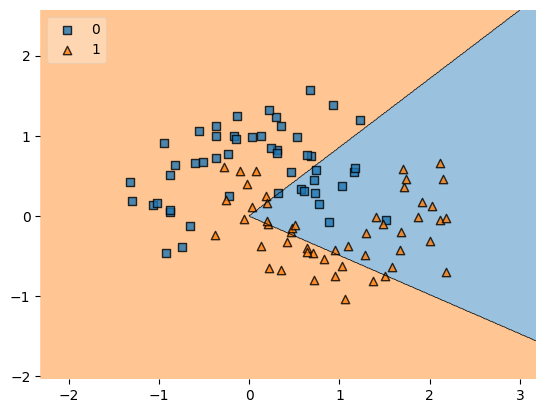

In [135]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)